<a href="https://colab.research.google.com/github/ibrahim10sy/learn-python/blob/main/TP_Regression_lineaire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REGRESSION LOGISTIQUE

In [ ]:
!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3

Import des bibliothèques

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, roc_curve


from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Import et lecture du jeux de donnée

In [33]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"

df = pd.read_csv(url)

In [3]:
df.sample(5)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
103,44.0,45.0,19.0,88.0,1.0,21.0,0.0,1.0,0.0,11.90,...,0.0,0.0,1.0,1.0,0.0,2.477,3.229,4.477,3.0,0.0
175,52.0,39.0,6.0,119.0,3.0,18.0,0.0,1.0,0.0,10.50,...,1.0,0.0,0.0,0.0,1.0,2.351,3.219,4.779,1.0,0.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
35,65.0,65.0,27.0,128.0,3.0,24.0,0.0,1.0,0.0,21.20,...,0.0,0.0,1.0,1.0,0.0,3.054,3.178,4.852,3.0,0.0
172,9.0,40.0,13.0,38.0,4.0,7.0,1.0,1.0,1.0,3.35,...,1.0,1.0,1.0,1.0,1.0,1.209,3.045,3.638,4.0,1.0


Affichage de la description statistique

In [4]:
df.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,...,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,...,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,...,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,...,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


Affichage des valeurs manquantes

In [5]:
df.isna()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Affichage des valeurs null

In [7]:
df.isnull()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

Sélection des feature

In [34]:
df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]
df['churn'] = df['churn'].astype('int')

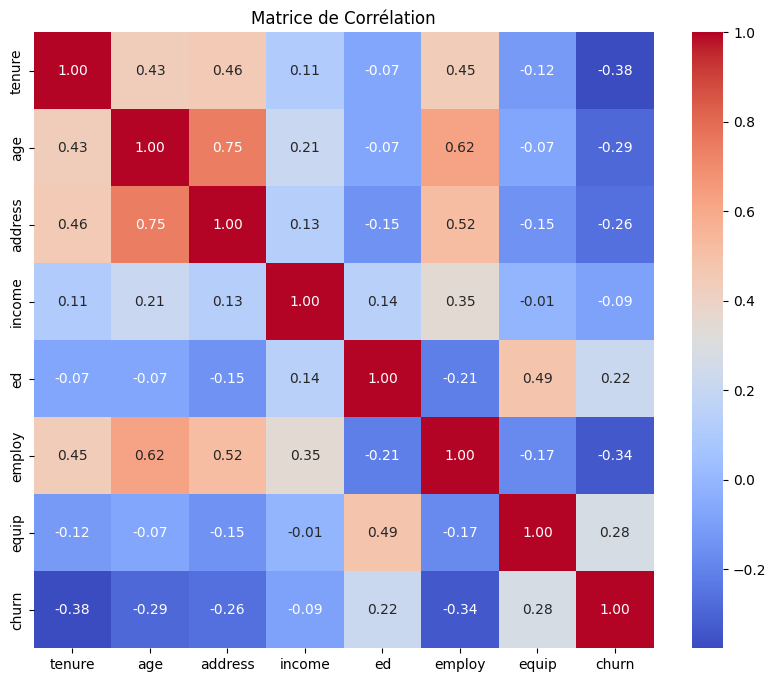

In [35]:
correlation_matrix = df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()

Modélisation du modèle logistique

In [36]:
X = np.asarray(df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [37]:
y = np.asarray(df['churn'])
# y_ = df.churn.to_numpy()
y[0:5]

array([1, 1, 0, 0, 0])

Standardisation de la valeur X

In [38]:
X_norm = StandardScaler().fit(X).transform(X)
X_norm[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

Séparation de de l'ensemble de données 80% train et 20% test


In [39]:
X_train,X_test,y_train,y_test = train_test_split(X_norm,y,test_size=0.2, random_state=4)

Modélisation du classificateur par régression logistique

In [40]:
LR = LogisticRegression().fit(X_train,y_train)

Prédisons le paramètre de désabonnement pour l'ensemble de données de test.

In [41]:
y_pred = LR.predict(X_test)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [49]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[25  0]
 [11  4]]
              precision    recall  f1-score   support

           0       0.69      1.00      0.82        25
           1       1.00      0.27      0.42        15

    accuracy                           0.72        40
   macro avg       0.85      0.63      0.62        40
weighted avg       0.81      0.72      0.67        40



In [53]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'AUC: {auc}')

Accuracy: 0.725
Precision: 1.0
Recall: 0.26666666666666666
F1-Score: 0.42105263157894735
AUC: 0.6333333333333333


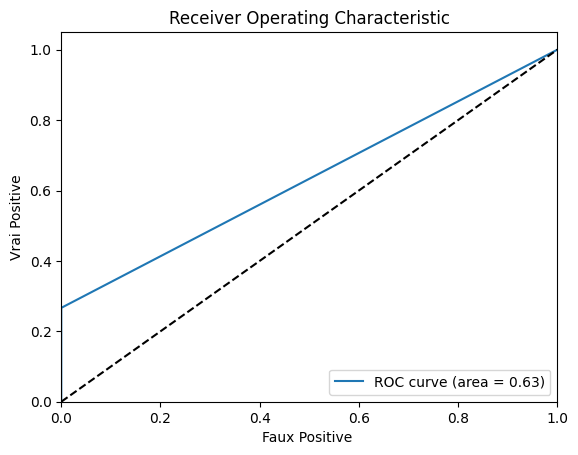

In [56]:
# Pour tracer la courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Faux Positive ')
plt.ylabel('Vrai Positive')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Pour comprendre cette prédiction, nous pouvons également examiner la probabilité de prédiction des points de données de l'ensemble de données de test.

In [30]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:10]

array([[0.74643946, 0.25356054],
       [0.92667894, 0.07332106],
       [0.83442627, 0.16557373],
       [0.94600618, 0.05399382],
       [0.84325532, 0.15674468],
       [0.71448367, 0.28551633],
       [0.77076426, 0.22923574],
       [0.90955642, 0.09044358],
       [0.26152115, 0.73847885],
       [0.94900731, 0.05099269]])

Visualisation du resultat

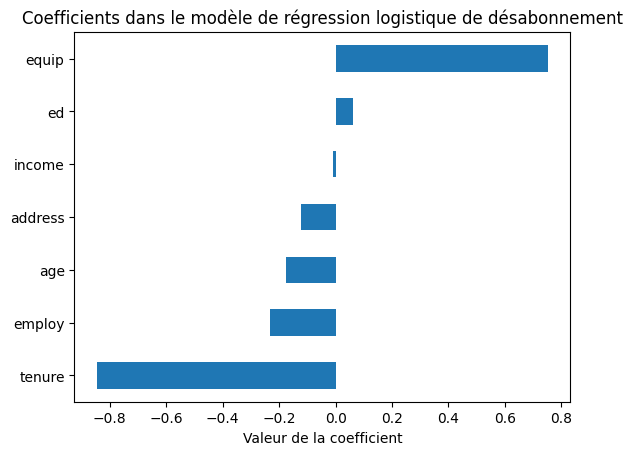

In [31]:
coefficients = pd.Series(LR.coef_[0], index=df.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Coefficients dans le modèle de régression logistique de désabonnement")
plt.xlabel("Valeur de la coefficient")
plt.show()